In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
            # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | san antonio de pale
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | manokwari
Processing Record 8 of Set 1 | santa maria do suacui
Processing Record 9 of Set 1 | rantepao
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | kenora
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | camarinas
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | severo-yenis

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,15.26,79,1,7.29,AU,1712501963
1,nar'yan-mar,67.6713,53.0870,-5.50,88,94,6.26,RU,1712501997
2,ribeira grande,38.5167,-28.7000,18.76,88,40,9.77,PT,1712501974
3,adamstown,-25.0660,-130.1015,22.69,76,38,4.76,PN,1712501990
4,san antonio de pale,-1.4014,5.6325,29.05,75,79,4.28,GQ,1712501985


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.26,79,1,7.29,AU,1712501963
1,nar'yan-mar,67.6713,53.0870,-5.50,88,94,6.26,RU,1712501997
2,ribeira grande,38.5167,-28.7000,18.76,88,40,9.77,PT,1712501974
3,adamstown,-25.0660,-130.1015,22.69,76,38,4.76,PN,1712501990
4,san antonio de pale,-1.4014,5.6325,29.05,75,79,4.28,GQ,1712501985


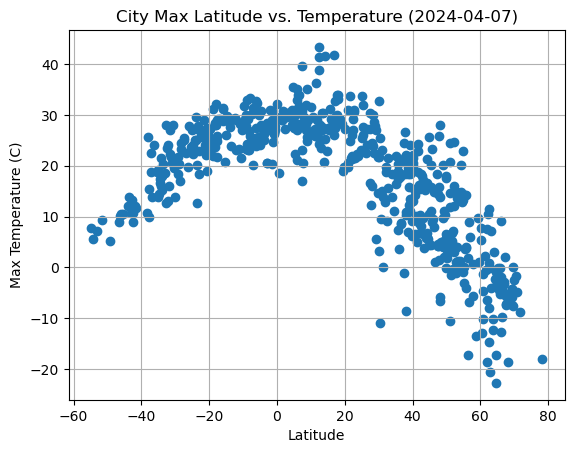

In [9]:
# Build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d',time.localtime(city_date))})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

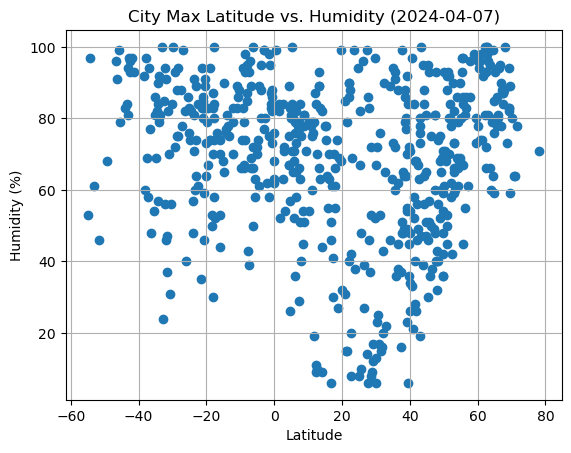

In [10]:
# Build scatter plot for latitude vs. humidity
lat_humid = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.title(f"City Max Latitude vs. Humidity ({time.strftime('%Y-%m-%d',time.localtime(city_date))})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

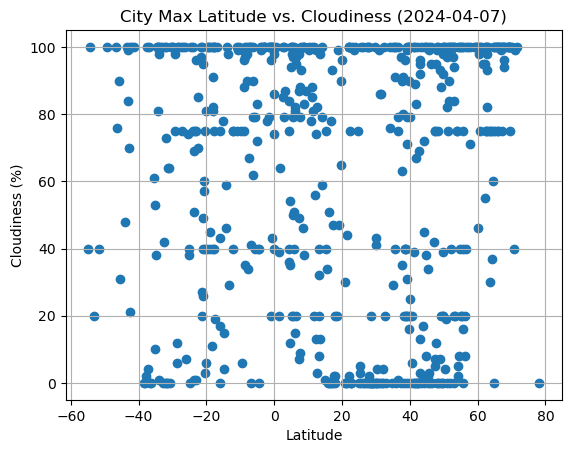

In [11]:
# Build scatter plot for latitude vs. cloudiness
# print(time.strftime(format[%y%m%d,localtime(city_date)]))

lat_cloud = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d',time.localtime(city_date))})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

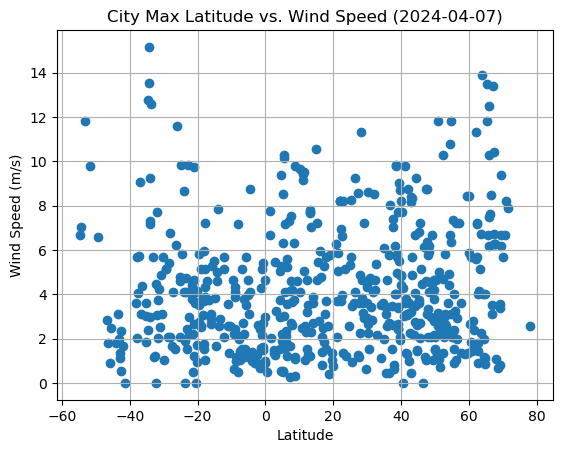

In [12]:
# Build scatter plot for latitude vs. wind speed
lat_wind = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.title(f"City Max Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d',time.localtime(city_date))})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [32]:
# Define a function to create Linear Regression plots


def regression(hemi_lat:pd.Series, weather:pd.Series, y_label, text_location):
    
    x_values:np.ndarray = list(hemi_lat.values)
    y_values:np.ndarray = list(weather.values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = []
    for x in x_values:
        y = x * slope + intercept
        regress_values.append(y)
    
    line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude") 
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_location, fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nar'yan-mar,67.6713,53.0870,-5.50,88,94,6.26,RU,1712501997
2,ribeira grande,38.5167,-28.7000,18.76,88,40,9.77,PT,1712501974
5,iskateley,67.6803,53.1512,-5.55,88,96,6.26,RU,1712502100
9,udachny,66.4167,112.4000,-9.75,94,100,7.61,RU,1712501964
10,constantia,44.1833,28.6500,16.50,84,45,3.48,RO,1712502101


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.26,79,1,7.29,AU,1712501963
3,adamstown,-25.0660,-130.1015,22.69,76,38,4.76,PN,1712501990
4,san antonio de pale,-1.4014,5.6325,29.05,75,79,4.28,GQ,1712501985
6,manokwari,-0.8667,134.0833,26.22,84,100,2.14,ID,1712502101
7,santa maria do suacui,-18.1903,-42.4142,23.63,70,91,1.74,BR,1712502101


In [35]:
#Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7070372043848483


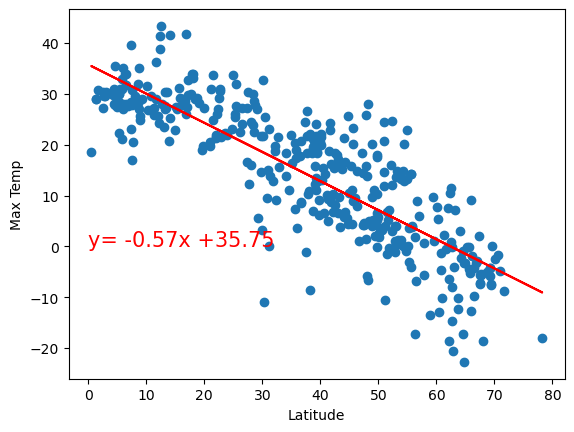

In [36]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (0,0))


The r-value is: 0.6051900032514518


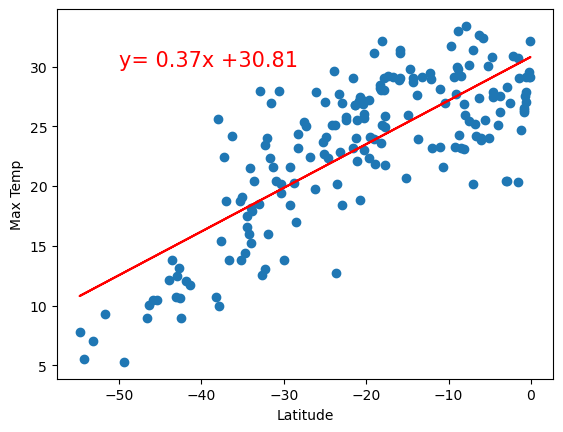

In [37]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-50, 30))

In [38]:
#Discussion about the linear relationship: 
# The two plots above are showing the relationship between the Latitude and Max Temperature of a city. 
# There is a moderate positive correlation (positive slope) between Latitude and Max Temp in the southern hemisphere and a strong negative 
# correlation (negative slope) between Latitude and Max Temp in the northern hemisphere. This makes sense because as you move towards the 
# equator (latitude = 0) the temperatures are warmer. 


In [39]:
#Humidity vs. Latitude Linear Regression Plot¶

The r-value is: 0.050575443838199896


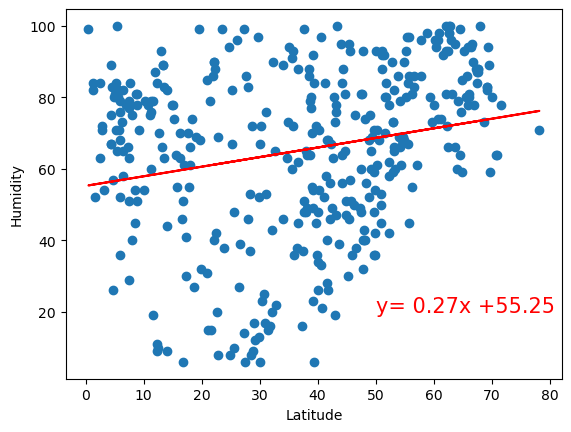

In [41]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (50, 20))

The r-value is: 3.48758832091241e-05


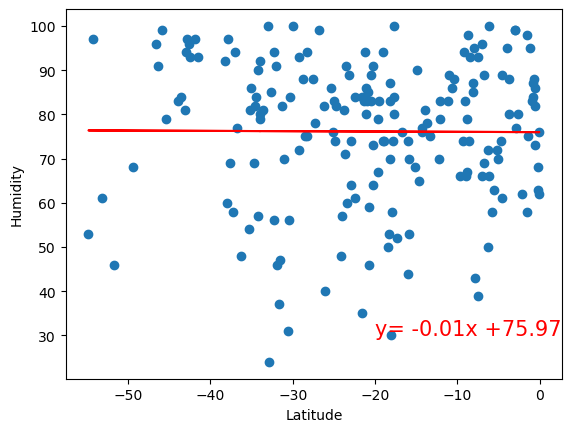

In [43]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-20,30))

In [23]:
#Discussion about the linear relationship: 
# The two plots above are showing the relationship between the Latitude and Humidity of a city. The northern hemisphere has very weak positive correlations 
# between latitude and humidity (positive slope, r value < 0.3). In the southern hemisphere there is no correlation or very weak negative 
# correlation between latitude and humidity (negative slope, r value < 0.3). This is represented by the regression line being very close to a straight line.
# This data is showing as the latitude changes there is not a large change in humidity.  

In [24]:
#Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01988802764501168


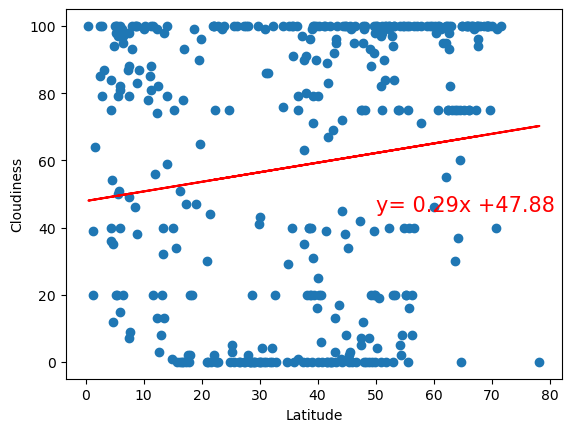

In [25]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (50,45))

The r-value is: 0.026400732432136337


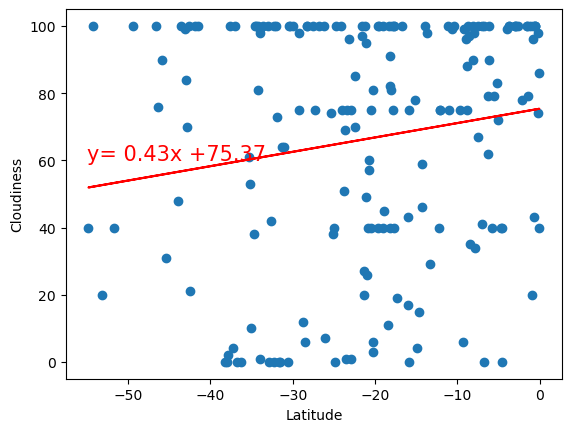

In [26]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55,60))

In [27]:
#Discussion about the linear relationship: 
# The two plots above are showing the relationship between the Latitude and Cloudiness of a city. In the northern hemisphere there is a very 
# weak positive correlation between latitude and cloudiness (positive slope, r < 0.3). In the southern hemisphere there is a very weak positive correlation or 
# between latitude in cloudiness (positive slope, r < 0.3). The data is showing that as the latitude increases in the southern hemisphere, the
# cloudiness slightly increases and as the latitude increases in the northern hemisphere, the cloudiness continues to slightly increase. 

In [28]:
#Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010003007567479046


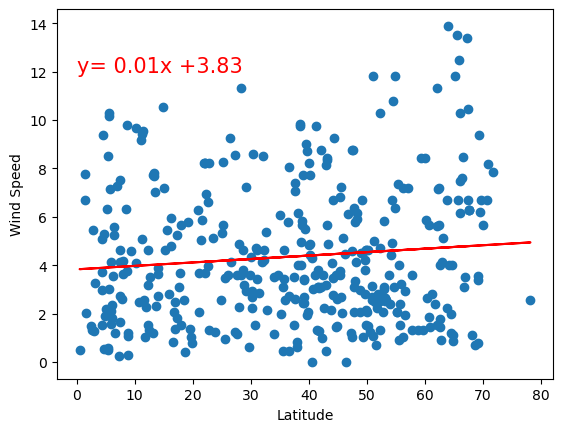

In [44]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0, 12))

The r-value is: 0.07604395421076028


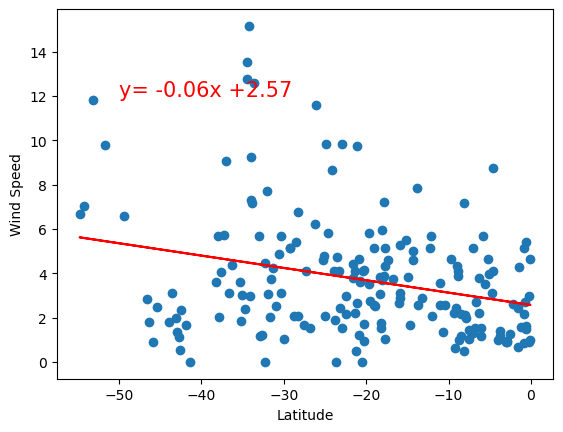

In [30]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 12))

In [31]:
#Discussion about the linear relationship: 
# The two plots above are showing the relationship between the Latitude and Wind Speed of a city.
# In the northern hemisphere there is no correlation or a very weak positive correlation between latitude and wind speed (r < 0.3, slope is
# positive) and this is represented by nearly a straight line. In the southern hemisphere there is a very weak negative correlation (r < 0.3, negative slope) between the latitude and 
# wind speed. The data is showing as the latitude moves away from zero in either direction, the wind speeds slightly increase or have no change at all. 